### Clustering
- **The task of grouping data points based on their similarity with each other is called Clustering or Cluster Analysis.** 

- Clustering is similar to classification, but the basis is different, In Clustering  we try to identify some segments or clusters in your data. 

- It evaluates the similarity based on a metric like Euclidean distance, Cosine similarity, Manhattan distance, etc. and then group the points with highest similarity score together.

- aims at gaining insights from unlabelled data points,

# K-Means Clustering
**Steps :**
1. Decide number of Clusers to be formed from the dataset

1. Randomly place Centroids for each cluster, the Centroids represent position of the entire cluster.

1. Assign same color or marker to datapoint closest to a specific cluster.

1. Find the Center of mass for every cluster fromed, It is done by taking average of diffrent properties or metric for classification **Excluding the current Centeroid**, <br> most probably, Euclidean distance, or (avg. 'x' co-ordinate, avg. 'y' co-ordinate).

1. The center of mass of each cluster is the new 'Centroid', Repeat the steps 3 & 4 for the new centroid, until best case (same centroid repeatedly).

1. Grouping after the last centroid, are the final CLusters, Sharing similler traits and properties.

<img src='https://i0.wp.com/www.blopig.com/blog/wp-content/uploads/2020/07/image-10.png?resize=449%2C395&ssl=1' alt='K-means clustering steps, img'>

### Use Case:
 1. **Marketing:** It can be used to characterize & discover customer segments for marketing purposes.
 1. **Image Processing:** Clustering can be used to group similar images together, classify images based on content, and identify patterns in image data.
 1. **Earthquake studies:** By learning the earthquake-affected areas we can determine the dangerous zones.

### The Elbow Method
**The first Importent question that arises, is "what is the optimal number of cluster? "**

- For determining  K(numbers of clusters) we use Elbow method.  

- It is kind of bakwards, process where we, At first make cluster, ranging from 'k=1' to 'k=n' where, k is number of cluster, and calculate the **WCSS** for every 'k'.

- Then we calculate **sumation between Centroid and datapoints** and plot it on the graph. <br> we look for the **Elbow of graph** point where **Slop, stops changing abruptly**.

<img src='https://media.licdn.com/dms/image/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_600_2000/0/1682277078758?e=2147483647&v=beta&t=VhzheKDjy7bEcsYyrjql3NQAUcTaMBCTzhZWSVVSeNg' alt='Elbow metord' width='50%'>

- **WCSS :**It is defined as the sum of square distances between the centroids and
each points.

    $$ WCSS = \sum_{P_i  in Cluster 1} d(P_1C_1)^2 + \sum_{P_i  in Cluster 2} d(P_2C_2)^2 + .... $$

where, <br> P<sub>x</sub>: individual Datapoint <br> C<sub>x</sub>: Centeroid


### K-Means++ initialization methord
- It is done to avoid rando initialization trap

- **Random Initialization Trap :** condition where a different set of clusters is generated when a different set of centroids are provided to the K-means algorithm making it inconsistent and unreliable.

<img src='https://lh3.googleusercontent.com/proxy/pSGPbRoenN4m9iSkEak7vE6jDF1YTM583divlw7-idagVi3Kg6T2s4VCFQmiIqc4YXLcVxTapyfVguFnnoCIkxzelV-VBudOORU8tsc4FFLekugRgIqwl7FI_zBt78TznmKjZ_CbRzK9b_1V' alt='Random Initialization Trap img'>

**Steps :**
1. Choose first centroid at random among data points.
1. For each of the remaining datapoints compute the distance (D) to the nearest out of already selected centroids.

1. Choose next centroid among remaining data points using **weighted** random selection - weighted by D<sup>2</sup>.

1. Repeat Step 2 & 3 until all 'k' centroids have been delected.

1. proceed with standard k-means clustering.

<img src='./cluster_photo/collage.png'>

 ## Data Pre-processing

In [2]:
# Importing the libaries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- There is no need of Dependent or independent variable, as we won't be predicting 'x' against 'y', but we will be forming cluster in 2D space, where 2 variables searve as co-ordinates.

- Therefor will be performing K-Means for 3 sets of data:
    1. Gender v/s Spending Score
    1. Age v/s Spending Score
    1. Anual Income v/s Spending Score

The graph formed me vary based on the dataset used, <br>

**We will be Perfroming K-Means Clustering for Anual Income v/s Spending Score**


In [3]:
# Importing the dataset
dataset = pd.read_csv("./cluster_dataset/Mall_Customers.csv")

age_x = dataset.iloc[:, [2,4]].values  # age v/s Spending score
income_x = dataset.iloc[:, [3,4]].values  # income v/s Spending score

X = dataset.iloc[:, -1].values.reshape(-1,1)
gender = dataset.iloc[:, -2].values

# Applying Lable encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender = le.fit_transform(gender).reshape(-1,1)
gender_x = np.concatenate((gender, X), axis = 1) # gender v/s Spending score

- we don't need to split the dataset into training and test, as we will be forming  cluster from whole dataset. 
### Using Elbow methord

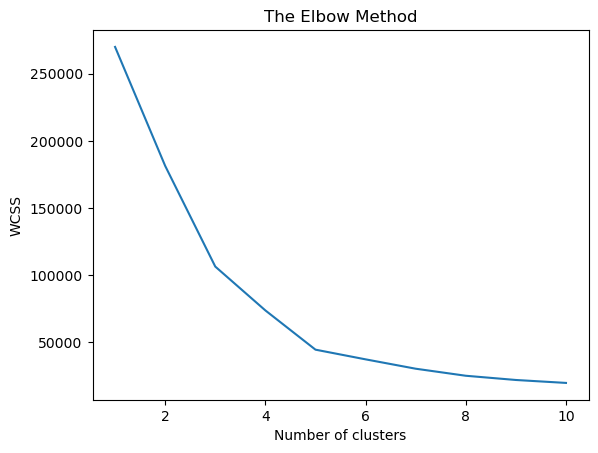

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(income_x)
    wcss.append(kmeans.inertia_) # inertia_ wcss = within cluster sum of squares

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# As we can see that the optimal number of cluster is 5.

### Training the dataset

In [12]:
# Applying K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42, n_init=10)
y_kmeans = kmeans.fit_predict(income_x)  # This will predict 5 clusters

# the Clustering index (CLustter number) starts from 0.
print(y_kmeans)

print(f'\nData Points \tCluster No.')
for i in range(10):
    print(f' {income_x[i]}  \t --> {y_kmeans[i]}')

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]

Data Points 	Cluster No.
 [15 39]  	 --> 2
 [15 81]  	 --> 3
 [16  6]  	 --> 2
 [16 77]  	 --> 3
 [17 40]  	 --> 2
 [17 76]  	 --> 3
 [18  6]  	 --> 2
 [18 94]  	 --> 3
 [19  3]  	 --> 2
 [19 72]  	 --> 3


### Visualising the CLusters (with FOR loop)

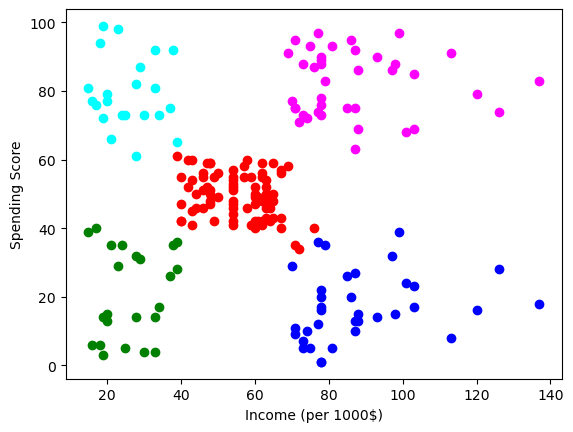

In [19]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []

for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        cluster_1.append(income_x[i])
    elif y_kmeans[i] == 1:
        cluster_2.append(income_x[i])
    elif y_kmeans[i] == 2:
        cluster_3.append(income_x[i])
    elif y_kmeans[i] == 3:
        cluster_4.append(income_x[i])
    elif y_kmeans[i] == 4:
        cluster_5.append(income_x[i])

plt.scatter(np.array(cluster_1)[:,0], np.array(cluster_1)[:,1], color = 'red')
plt.scatter(np.array(cluster_2)[:,0], np.array(cluster_2)[:,1], color = 'blue')
plt.scatter(np.array(cluster_3)[:,0], np.array(cluster_3)[:,1], color = 'green')
plt.scatter(np.array(cluster_4)[:,0], np.array(cluster_4)[:,1], color = 'cyan')
plt.scatter(np.array(cluster_5)[:,0], np.array(cluster_5)[:,1], color = 'magenta')

plt.xlabel('Income (per 1000$)')
plt.ylabel('Spending Score')
plt.show()

### Another Compact methord (Without FOR loop)

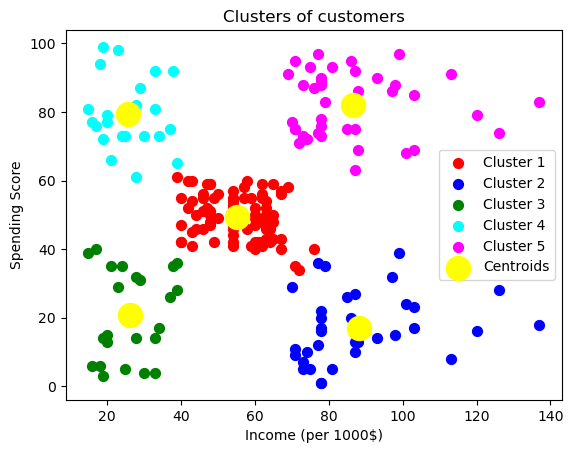

In [25]:
x = income_x
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income (per 1000$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()